# Segundo Cap. - Taxa de Retorno e Cálculo de Risco

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [2]:
data = pd.read_csv('acoes.csv')

acoes_novas = pd.read_csv('exercicios.csv')

In [3]:
data

,Date,GOL,CVC,WEG,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1688,2021-10-25,17.200001,18.150000,39.549999,12.340000,33.380001,104.550003
1689,2021-10-26,16.180000,16.910000,39.660000,11.980000,33.400002,102.250000
1690,2021-10-27,15.890000,16.590000,39.200001,11.600000,33.200001,102.400002
1691,2021-10-28,15.740000,16.530001,37.830002,11.150000,32.910000,100.610001


In [4]:
acoes_novas

,Date,AMBEV,ODONTO,VIVO,PETR,BB,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1689,2021-10-26,15.160000,12.90,44.790001,29.270000,29.200001,102.250000
1690,2021-10-27,15.220000,13.21,44.590000,29.309999,29.170000,102.400002
1691,2021-10-28,16.700001,13.10,45.000000,29.590000,28.910000,100.610001
1692,2021-10-29,16.990000,13.41,45.520000,27.670000,28.500000,99.680000


## Taxa de Retorno Simples

RS = ((PREÇO FINAL - PREÇO INICIAL) / PREÇO INICIAL) * 100

In [5]:
len(data)

1693

In [6]:
data.shape

(1693, 7)

In [7]:
#verificando primeiro registro da GOL para implementarmos o cálculo da tx de retorno simples

data['GOL'][0], data['GOL'][len(data)-1]

(14.989999771118164, 15.18000030517578)

In [8]:
((data['GOL'][len(data)-1] - data['GOL'][0]) / data['GOL'][0])*100

1.267515256562559

In [9]:
((data['CVC'][len(data)-1] - data['CVC'][0]) / data['CVC'][0])*100

5.065792548854635

In [10]:
((data['WEG'][len(data)-1] - data['WEG'][0]) / data['WEG'][0])*100

524.6754059121735

In [11]:
((data['MGLU'][len(data)-1] - data['MGLU'][0]) / data['MGLU'][0])*100

4543.231582893453

In [12]:
((data['TOTS'][len(data)-1] - data['TOTS'][0]) / data['TOTS'][0])*100

175.04675210956978

In [13]:
((data['BOVA'][len(data)-1] - data['BOVA'][0]) / data['BOVA'][0])*100

110.91833230082513

## Taxa de Retorno Diária

In [14]:
#automatizando o processo para obter a tx diária - utilizando comando 'shift'

data['GOL'].shift(1)

0             NaN
1       14.990000
2       14.850000
3       15.210000
4       14.550000
          ...    
1688    17.080000
1689    17.200001
1690    16.180000
1691    15.890000
1692    15.740000
Name: GOL, Length: 1693, dtype: float64

In [15]:
# criando uma coluna para a tx de retorno 

data['RS GOL'] = (data['GOL'] / data['GOL'].shift(1))-1

In [16]:
data

,Date,GOL,CVC,WEG,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998,NaN
1,2015-01-05,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000,-0.009340
2,2015-01-06,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002,0.024242
3,2015-01-07,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002,-0.043392
4,2015-01-08,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
1688,2021-10-25,17.200001,18.150000,39.549999,12.340000,33.380001,104.550003,0.007026
1689,2021-10-26,16.180000,16.910000,39.660000,11.980000,33.400002,102.250000,-0.059302
1690,2021-10-27,15.890000,16.590000,39.200001,11.600000,33.200001,102.400002,-0.017923
1691,2021-10-28,15.740000,16.530001,37.830002,11.150000,32.910000,100.610001,-0.009440


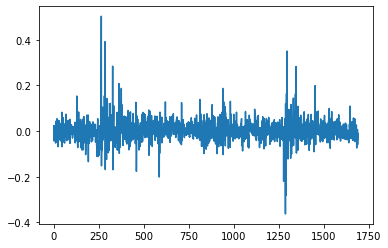

In [17]:
# visualizando apenas esse retorno

data['RS GOL'].plot();

In [18]:
# checando a média diária de retorno

data['RS GOL'].mean()

0.0011991216930401364

## Taxa de Retorno Anual

In [19]:
(data['RS GOL'].mean() * 246 ) * 100

29.498393648787356

In [20]:
data['RS CVC'] = (data['CVC'] / data['CVC'].shift(1)) -1
data['RS WEG'] = (data['WEG'] / data['WEG'].shift(1)) -1
data['RS MGLU'] = (data['MGLU'] / data['MGLU'].shift(1)) -1
data['RS TOTS'] = (data['TOTS'] / data['TOTS'].shift(1)) -1
data['RS BOVA'] = (data['BOVA'] / data['BOVA'].shift(1)) -1

In [21]:
data

,Date,GOL,CVC,WEG,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEG,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,2015-01-08,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,2021-10-25,17.200001,18.150000,39.549999,12.340000,33.380001,104.550003,0.007026,0.061403,0.016971,-0.006441,0.047052,0.021695
1689,2021-10-26,16.180000,16.910000,39.660000,11.980000,33.400002,102.250000,-0.059302,-0.068320,0.002781,-0.029173,0.000599,-0.021999
1690,2021-10-27,15.890000,16.590000,39.200001,11.600000,33.200001,102.400002,-0.017923,-0.018924,-0.011599,-0.031719,-0.005988,0.001467
1691,2021-10-28,15.740000,16.530001,37.830002,11.150000,32.910000,100.610001,-0.009440,-0.003617,-0.034949,-0.038793,-0.008735,-0.017480


In [22]:
(data['RS CVC'].mean() * 246)* 100

16.252532949641598

In [23]:
(data['RS WEG'].mean() * 246)* 100

32.77174601019925

In [24]:
(data['RS MGLU'].mean() * 246)* 100

75.34316919262795

In [25]:
(data['RS TOTS'].mean() * 246)* 100

21.989491321971627

In [26]:
(data['RS BOVA'].mean() * 246)* 100

14.392225969529388

## Taxa de Retorno Logarítmica

In [27]:
np.log(data['GOL'][len('data')-1] / data['GOL'][0]) * 100

-2.9792290119110945

In [28]:
np.log(data['CVC'][len('data')-1] / data['CVC'][0]) * 100

-3.549081794831594

In [29]:
np.log(data['WEG'][len('data')-1] / data['WEG'][0]) * 100

-1.9672679762267362

In [30]:
np.log(data['MGLU'][len('data')-1] / data['MGLU'][0]) * 100

3.818976340774428

In [31]:
np.log(data['TOTS'][len('data')-1] / data['TOTS'][0]) * 100

-10.288060963365634

In [32]:
np.log(data['BOVA'][len('data')-1] / data['BOVA'][0]) * 100

1.8656933691075301

In [33]:
data['RL GOL'] = np.log(data['GOL'] / data['GOL'].shift(1))
data['RL CVC'] = np.log(data['CVC'] / data['CVC'].shift(1))
data['RL WEG'] = np.log(data['WEG'] / data['WEG'].shift(1))
data['RL MGLU'] = np.log(data['MGLU'] / data['MGLU'].shift(1))
data['RL TOTS'] = np.log(data['TOTS'] / data['TOTS'].shift(1))
data['RL BOVA'] = np.log(data['BOVA'] / data['BOVA'].shift(1))

In [34]:
data

,Date,GOL,CVC,WEG,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEG,RS MGLU,RS TOTS,RS BOVA,RL GOL,RL CVC,RL WEG,RL MGLU,RL TOTS,RL BOVA
0,2015-01-02,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.009383,-0.013245,0.006795,0.018618,-0.031208,-0.020090
2,2015-01-06,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.023953,-0.013423,-0.014945,-0.013263,-0.064577,0.005597
3,2015-01-07,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,-0.044362,-0.008823,-0.011523,0.032835,-0.007096,0.033150
4,2015-01-08,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.019432,-0.036090,0.016746,-0.007782,0.022954,0.007449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,2021-10-25,17.200001,18.150000,39.549999,12.340000,33.380001,104.550003,0.007026,0.061403,0.016971,-0.006441,0.047052,0.021695,0.007001,0.059592,0.016829,-0.006462,0.045978,0.021463
1689,2021-10-26,16.180000,16.910000,39.660000,11.980000,33.400002,102.250000,-0.059302,-0.068320,0.002781,-0.029173,0.000599,-0.021999,-0.061133,-0.070765,0.002777,-0.029607,0.000599,-0.022245
1690,2021-10-27,15.890000,16.590000,39.200001,11.600000,33.200001,102.400002,-0.017923,-0.018924,-0.011599,-0.031719,-0.005988,0.001467,-0.018086,-0.019105,-0.011666,-0.032233,-0.006006,0.001466
1691,2021-10-28,15.740000,16.530001,37.830002,11.150000,32.910000,100.610001,-0.009440,-0.003617,-0.034949,-0.038793,-0.008735,-0.017480,-0.009485,-0.003623,-0.035574,-0.039566,-0.008773,-0.017635


In [35]:
# verificando a taxa de retorno logarítmica acumulada do ano

(data['RL GOL'].mean() * 246)* 100

0.18312599441690297

In [36]:
(data['RL CVC'].mean() * 246)* 100

0.718467769287726

In [37]:
(data['RL WEG'].mean() * 246)* 100

26.636362095830375

In [38]:
(data['RL TOTS'].mean() * 246)* 100

14.710144362020932

In [39]:
(data['RL BOVA'].mean() * 246)* 100

10.850472941900252

## Taxa de Retorno de Carteira de Ações

In [ ]:
# importando a base novamente para vir sem as novas colunas adicionadas recentemente

